<a href="https://colab.research.google.com/github/kalpeshkrish/K/blob/main/c115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

\
Today, we have some data of 1000 students that applied to a university. We know the scores of these students, and we also know if they were accepted to the university or not.

\
Can we build a model where we can predict if a student will get admitted based on their marks? Let's try!

In [ ]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


Here, we have loaded the data. Let's see how the data looks like in a scatter plot -

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("data.csv")

score_list = df["Score"].tolist()
accepted_list = df["Accepted"].tolist()

fig = px.scatter(x=score_list, y=accepted_list)
fig.show()

Using the following formula -



```
y = mc + c
```

Let's try to find out the line of regression in this plot.

In [ ]:
import numpy as np
score_array = np.array(score_list)
accepted_array = np.array(accepted_list)

#Slope and intercept using pre-built function of Numpy
m, c = np.polyfit(score_array, accepted_array, 1)

y = []
for x in score_array:
  y_value = m*x + c
  y.append(y_value)

#plotting the graph
fig = px.scatter(x=score_array, y=accepted_array)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= min(y), y1= max(y),
      x0= min(score_array), x1= max(score_array)
    )
])
fig.show()

If we look at this line, does it make sense?

\
Of course not. This graph deserves a curvy line. We can see that students up to the score of 82.7 were not accepted.

\
This graph can be better represented by the sigmoid function, which looks like this.

\
\
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

\
Here, the x in the image is the value of ```mx + c```. Let's try to calculate and plot this.

\
The logistic sigmoid function is defined as (1/(1 + e^-x)) and it takes an input x of any real number and returns an output value in the range of -1 and 1.

\
Here we'll use hit and trial on the X_test to find the value which will lie on the line at the intersection.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



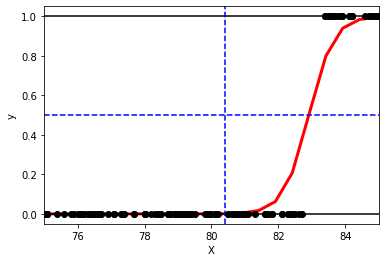

In [ ]:
# first we import pyplot and logisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#Then we reshape the array using the reshape function from a 3 by 3 matrix to a single array
X = np.reshape(score_list, (len(score_list), 1)) #np.reshape reshapes the arrays without changing the data. It changes the shape and size of the array.
Y = np.reshape(accepted_list, (len(accepted_list), 1))

#Use logisticRegression model to fit the data into the model so that it can make predictions with maximum accuracy
lr = LogisticRegression()
lr.fit(X, Y)

#creating a scatter plot
plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

#defining the sigmoid function to predict the probability as ouput
def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula #Using the line space function to evenly space the dots and using ravel function to create a single array
X_test = np.linspace(0, 100, 200) #np.linspace returns evenly spaced numbers over a specified interval.
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()   #ravel() is used to convert 2 arrays into one.

#Plotting the plot with different colors. axhline stands for axis horizontal line
plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')

# do hit and trial by changing the value of X_test  to find the value which lies on the line at the intersection.

plt.axvline(x=X_test[160], color='b', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(75, 85)
plt.show()

In [ ]:
lr.coef_ 

array([[2.70984574]])

In [ ]:
lr.intercept_

array([-224.6674072])

In [ ]:
user_score = float(input("Enter your marks here:- "))
chances = model(user_score * lr.coef_ + lr.intercept_).ravel()[0]
if chances <= 0.01:
  print("The student will not get accepted")
elif chances >= 1:
  print("The student will get accepted!")
elif chances < 0.5:
  print("The student might not get accepted")
else:
  print("The student may get accepted")

Enter your marks here:- 99
The student will get accepted!
